<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/1_30_Matplotlib Labeling.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
!pip install datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

## 🟩 Bar Chart with Labels (1.30.1)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'France'),
  Text(4, 0, 'Germany')])

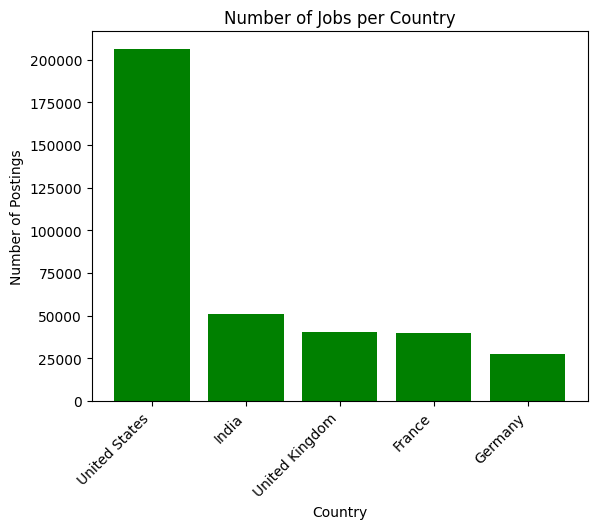

In [8]:
job_country = df["job_country"].value_counts().head(5)
plt.bar(job_country.index, job_country.values, color="green")
plt.title("Number of Jobs per Country")
plt.xlabel("Country")
plt.ylabel("Number of Postings")
plt.xticks(rotation=45, ha="right")

---

## 🟨 Horizontal Bar Chart with Labels (1.30.2)

Text(0.5, 0, 'Average Salary')

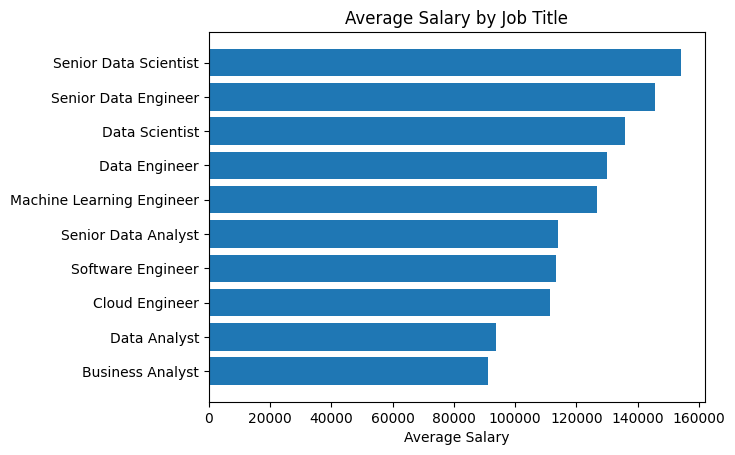

In [15]:
salary = df.groupby("job_title_short")["salary_year_avg"].mean()
salary = salary.sort_values(ascending=True)
plt.barh(salary.index, salary.values)
plt.title("Average Salary by Job Title")
plt.xlabel("Average Salary")
#plt.xticks(rotation=45, ha="right")

---

## 🟥 Line Chart with Labels (1.30.3)

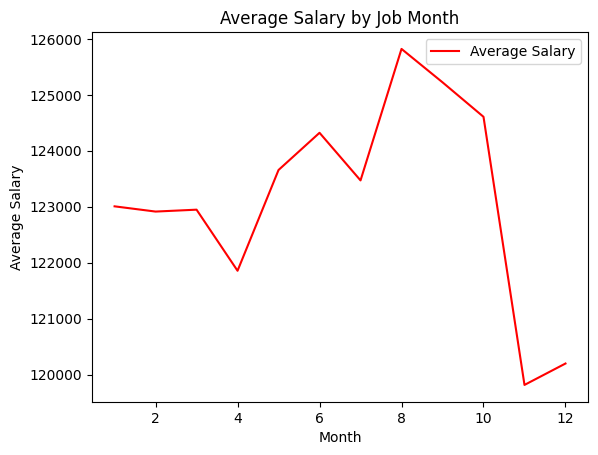

In [25]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_posted_month"] = df["job_posted_date"].dt.month
monthly_salary = df.groupby("job_posted_month")["salary_year_avg"].mean().sort_index()
plt.plot(monthly_salary.index, monthly_salary, color="red",label="Average Salary")
plt.title("Average Salary by Job Month")
plt.xlabel("Month")
plt.ylabel("Average Salary")
plt.legend() #Grafikteki tüm label'ları bir lejant (legend) olarak gösterir.
plt.show()




**1. df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])**
* Ne Yapar? job_posted_date sütunundaki değerleri, Python'ın tarih ve saat işlemleri yapabileceği bir formata (datetime) dönüştürür.
* Neden Gerekli? Tarih bilgileri genellikle metin (string) formatında olabilir. Örneğin, "2023-01-15" gibi. Bu metin formatındaki tarihleri, Python'ın tarih işlemleri yapabilmesi için datetime formatına çevirmemiz gerekir.
* Örnek:
1. Dönüşüm öncesi: "2023-01-15" (string)
2. Dönüşüm sonrası: 2023-01-15 (datetime)

**2. df["job_posted_month"] = df["job_posted_date"].dt.month**
* Ne Yapar? job_posted_date sütunundaki her bir tarihin ay bilgisini çıkarır ve yeni bir sütun olan job_posted_month'a kaydeder.
* Nasıl Çalışır?
df["job_posted_date"].dt.month: datetime formatındaki tarihlerden ay bilgisini çıkarır. .dt erişimi, tarih işlemleri yapmak için kullanılır.
* Örnek:
1. 2023-01-15 → 1
2. 2023-02-20 → 2
3. 2023-03-10 → 3

1. df.groupby("job_posted_month")

* Ne Yapar? DataFrame'i job_posted_month sütunundaki değerlere göre gruplar.
* Nasıl Çalışır? job_posted_month sütunundaki benzersiz değerler (örneğin, 1, 2, 3, ..., 12) her bir grup için bir anahtar (key) olur.
* Örnek:
Eğer job_posted_month sütunu şu değerlere sahipse: [1, 2, 1, 3, 2], bu durumda:
**Grup 1**: job_posted_month == 1 olan satırlar.
**Grup 2**: job_posted_month == 2 olan satırlar.
**Grup 3**: job_posted_month == 3 olan satırlar.
2. ["salary_year_avg"]

* Ne Yapar? Gruplama işlemi yapıldıktan sonra, sadece salary_year_avg sütununu seçer.
* Neden Gerekli? Çünkü sadece bu sütun üzerinde ortalama hesaplamak istiyoruz.

---